# Sesión 2 - Aplicación de MCO

## Regresión simple 

In [1]:
#Instalacion del paquete
#pip install statsmodels

In [2]:
#Importacion del paquete
import statsmodels.api as sm

In [3]:
#Importamos Pandas
import pandas as pd

#Creamos el DataFrame
ejemplo = pd.DataFrame({'horas': [0, 0, 1, 1, 2, 4, 5, 5, 6, 6, 7, 8, 10, 11, 11, 12, 12, 14, 14, 14],
                   'puntaje': [90, 50, 60, 64, 66, 76, 73, 74, 81, 83, 82, 80, 88, 84, 82, 91, 93, 89, 100, 80]})

#view DataFrame
print(ejemplo)

    horas  puntaje
0       0       90
1       0       50
2       1       60
3       1       64
4       2       66
5       4       76
6       5       73
7       5       74
8       6       81
9       6       83
10      7       82
11      8       80
12     10       88
13     11       84
14     11       82
15     12       91
16     12       93
17     14       89
18     14      100
19     14       80


In [4]:
#Correlacion entre las variables
correlacion=ejemplo.corr()
correlacion

,horas,puntaje
horas,1.000000,0.738483
puntaje,0.738483,1.000000


In [5]:
#Definir la variable dependiente y la independiente
y = ejemplo['puntaje']
x = ejemplo['horas']

#Añadimos una constante al modelo
x = sm.add_constant(x)

#print(x)

#Ajustamos el modelo de MCO
modelo = sm.OLS(y, x).fit()

#print(modelo)

#Observamos el resultado
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                puntaje   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     21.59
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           0.000201
Time:                        18:41:52   Log-Likelihood:                -69.956
No. Observations:                  20   AIC:                             143.9
Df Residuals:                      18   BIC:                             145.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.1376      3.402     19.439      0.0

Text(0, 0.5, 'Puntaje del examen')

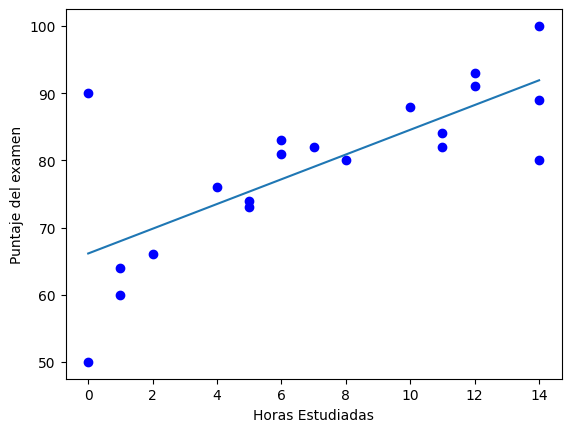

In [6]:
#Importamos la libreria para graficar
import matplotlib.pyplot as plt
import numpy as np

#Encontramos la mejor linea
a, b = np.polyfit(ejemplo['horas'], ejemplo['puntaje'], 1)

#Añadimos puntos al gráfico
plt.scatter(ejemplo['horas'], ejemplo['puntaje'], color='blue')

#Añadimos la linea del modelo
plt.plot(ejemplo['horas'], a*ejemplo['horas']+b)

#Añadimos los nombres de los ejes
plt.xlabel('Horas Estudiadas')
plt.ylabel('Puntaje del examen')

<Axes: xlabel='horas', ylabel='puntaje'>

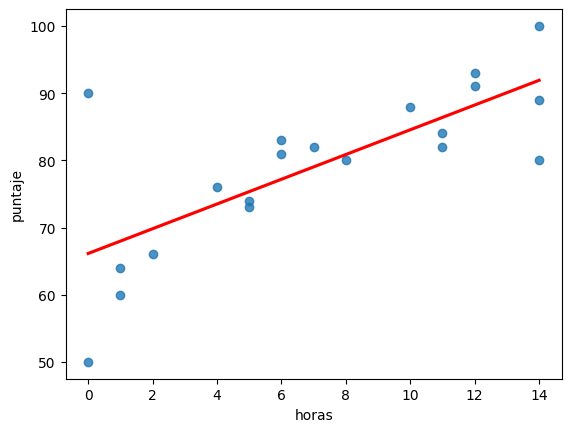

In [7]:
#Otra alternativa para graficar

#Importamos otra libreria
import seaborn as sns

#Graficamos
sns.regplot(x='horas', y='puntaje', data=ejemplo, ci=False, line_kws={'color': 'red'})

## Regresión múltiple 

In [8]:
#Importamos una base de datos del internet
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

#Creamos los nombres
nombres_var = ['mpg', 'cilindros', 'cilindrada', 'caballos_fuerza', 'peso', 'aceleracion', 'modelo_anho', 'origen', 'nombre']

#Le ponemos nombres a las variables
ejemplo_2 = pd.read_csv(url, names=nombres_var, delim_whitespace=True)

In [9]:
#Observamos la base de datos
ejemplo_2.head(10)

,mpg,cilindros,cilindrada,caballos_fuerza,peso,aceleracion,modelo_anho,origen,nombre
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl


In [10]:
#Revisamos si existen valores nulos
ejemplo_2.isnull().sum()

mpg                0
cilindros          0
cilindrada         0
caballos_fuerza    0
peso               0
aceleracion        0
modelo_anho        0
origen             0
nombre             0
dtype: int64

In [11]:
#Eliminamos aquellas variables que no nos sirven para el análisis
ejemplo_2 = ejemplo_2.drop('nombre', axis=1)

In [12]:
#Analizamos el tipo de variables que vamos a usar
ejemplo_2.dtypes

mpg                float64
cilindros            int64
cilindrada         float64
caballos_fuerza     object
peso               float64
aceleracion        float64
modelo_anho          int64
origen               int64
dtype: object

In [13]:
#Eliminamos los valores de caballos de fuerza con ?
ejemplo_2 = ejemplo_2[ejemplo_2.caballos_fuerza != '?']

In [14]:
#Convertimos la variable de caballos de fuerza a un float64
ejemplo_2['caballos_fuerza'] = ejemplo_2['caballos_fuerza'].astype('str').astype('float')

In [15]:
#Correlacion entre las variables
correlacion=ejemplo_2.corr()
correlacion

,mpg,cilindros,cilindrada,caballos_fuerza,peso,aceleracion,modelo_anho,origen
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cilindros,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
cilindrada,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
caballos_fuerza,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
peso,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
aceleracion,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
modelo_anho,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origen,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


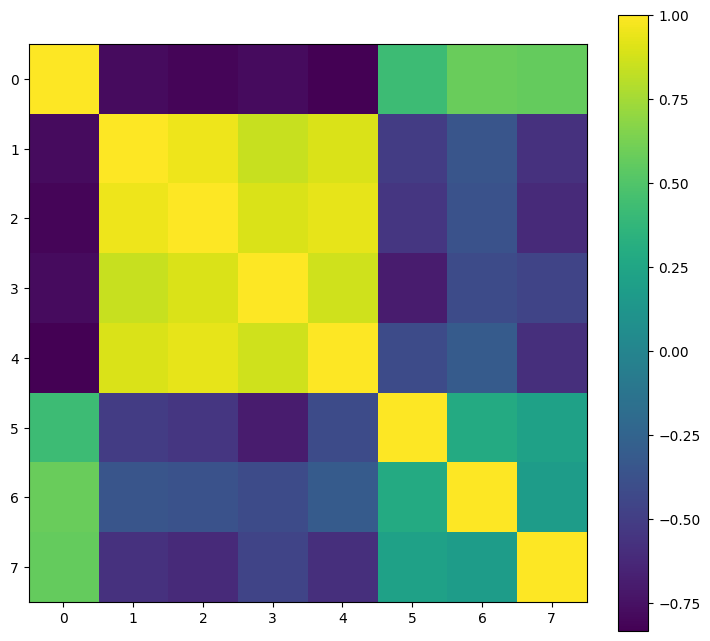

In [16]:
#Graficamos la correlacion
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(correlacion, interpolation='nearest')
fig.colorbar(im, orientation='vertical', fraction = 0.05)

### Metodología clásica 

In [17]:
#Definir la variable dependiente y la independiente
y = ejemplo_2['mpg']
X = ejemplo_2[['cilindrada', 'caballos_fuerza', 'peso', 'aceleracion']]

#Añadimos una constante al modelo
X = sm.add_constant(X)

#Ajustamos el modelo de MCO
modelo_2 = sm.OLS(y, X).fit()

#Observamos el resultado
print(modelo_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     233.4
Date:                Wed, 30 Aug 2023   Prob (F-statistic):          9.63e-102
Time:                        18:41:55   Log-Likelihood:                -1120.6
No. Observations:                 392   AIC:                             2251.
Df Residuals:                     387   BIC:                             2271.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              45.2511      2.456     

### Otra metodología

In [18]:
#Importamos una libreria para poder dividir nuestros datos en una parte de entrenamiento y otra de prueba
from sklearn.model_selection import train_test_split

#Realizamos la división como tal
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
#Creamos la constante
X_train = sm.add_constant(X_train)

#Desarrollamos el modelo
modelo_3 = sm.OLS(y_train, X_train).fit()

#Observamos los resultados de nuestro modelo
print(modelo_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     194.6
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           5.45e-83
Time:                        18:41:55   Log-Likelihood:                -895.49
No. Observations:                 313   AIC:                             1801.
Df Residuals:                     308   BIC:                             1820.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              46.4211      2.734     

In [20]:
#Creamos datos de evaluación para la parte de prueba
X_test = sm.add_constant(X_test)

#Predecimos el valor de la variable dependiente para la parte de prueba
y_pred = modelo_3.predict(X_test)

#Importamos una libreria para medir el R2
from sklearn.metrics import r2_score

#Encontramos qué tan acertado fue nuestro modelo en la parte de prueba
r2_score(y_test, y_pred)

0.6460478972647503

## Tarea

### Ejercicio 1 

In [21]:
# Estos datos generan una secuencia de números aleatorios
import random
random.seed(42)
exp = []
for i in range(0,50):
    n = random.randint(1, 30)
    exp.append(n)

#Estos datos generan otra secuencia de números aleatorios
salario = []
for i in range(0, 50):
    n = random.randint(2000, 10000)
    salario.append(n)
    
#Se crea una lista con nombres
nombres = ['exp', 'salario']

#Union de los dos datos
union = list(zip(exp, salario))

#Unimos las variables en una sola
salario_exp = pd.DataFrame(union, index = None, columns = nombres)

In [24]:
salario_exp.shape

(50, 2)

In [38]:
salario_exp.head(5)

,exp,salario
0,21,2837
1,4,2759
2,1,5112
3,24,2792
4,9,4940


In [27]:
#Desean realizar una regresión del salario respecto a los años de experiencia

#1.a) Creen variables simples para realizar el análisis
x = salario_exp['exp']
y = salario_exp['salario']

#1.b) Añadan una constante el modelo
x = sm.add_constant(x)

#1.c) Ajusten el modelo
ejercicio_1 = sm.OLS(y, x).fit()

#1.d) Muestren los resultados del modelo
print(ejercicio_1.summary())

                            OLS Regression Results                            
Dep. Variable:                salario   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                   0.01922
Date:                Wed, 30 Aug 2023   Prob (F-statistic):              0.890
Time:                        18:46:42   Log-Likelihood:                -458.27
No. Observations:                  50   AIC:                             920.5
Df Residuals:                      48   BIC:                             924.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5641.8047    631.754      8.930      0.0

<Axes: xlabel='exp', ylabel='salario'>

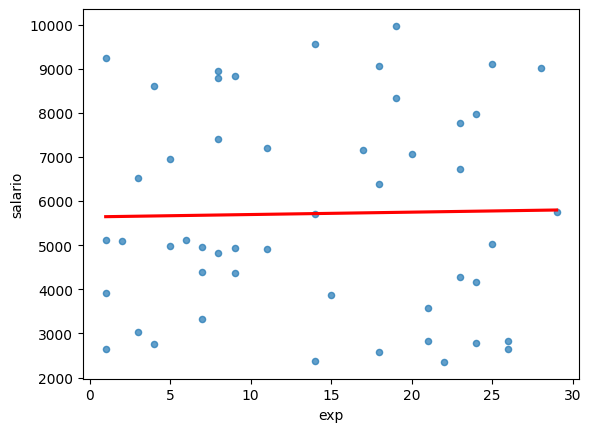

In [28]:
#1.e) Grafiquen los datos junto al modelo estimados

sns.regplot(x='exp', y='salario', data=salario_exp, ci=False, line_kws={'color': 'red'}, scatter_kws={'s': 20, 'alpha': 0.7})

### Ejercicio 2

In [30]:
ejemplo_2.head(5)

,mpg,cilindros,cilindrada,caballos_fuerza,peso,aceleracion,modelo_anho,origen
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [32]:
#Usen la base de datos importada de internet, se llama ejemplo_2, hagan una regresion de la aceleración con el peso, 
#año caballos de fuerza y cilindrada

#2.a) Establezcan claramente las variables dependiente e independientes
X = ejemplo_2[['peso', 'modelo_anho', 'caballos_fuerza','cilindrada']]
y = ejemplo_2['aceleracion']

#2.b) Añadan la constante
X = sm.add_constant(X)

#2.c) Ajusten el modelo
ejercicio_2 = sm.OLS(y, X).fit()

#2.d) Muestren los resultados
print(ejercicio_2.summary())

                            OLS Regression Results                            
Dep. Variable:            aceleracion   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     156.6
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           1.48e-79
Time:                        18:56:01   Log-Likelihood:                -764.82
No. Observations:                 392   AIC:                             1540.
Df Residuals:                     387   BIC:                             1559.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              20.1974      2.095     

<Axes: xlabel='peso', ylabel='aceleracion'>

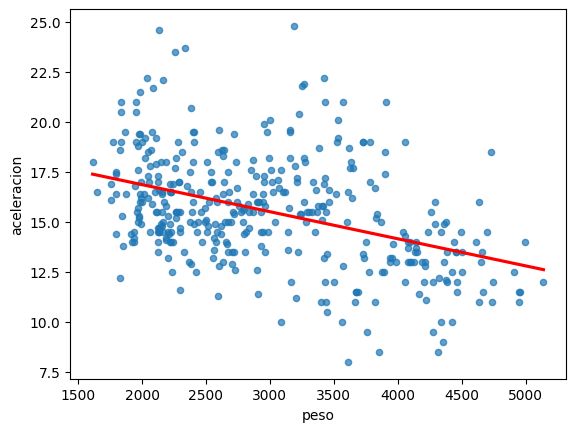

In [36]:
#1.e) Grafiquen los datos junto al modelo estimados

sns.regplot(x='peso', y='aceleracion', data=ejemplo_2, ci=False, line_kws={'color': 'red'}, scatter_kws={'s': 20, 'alpha': 0.7})

In [37]:
#Ahora usaremos la metodología de división en entrenamiento y prueba

#2.e) Dividan la base de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#2.f) Desarrollen y encuentren el modelos correspondiente

#Añadan la constante
X_train = sm.add_constant(X_train)

#Ajusten el modelo
ejercicio_2_e = sm.OLS(y_train, X_train).fit()

#Muestren los resultados
print(ejercicio_2_e.summary())

                            OLS Regression Results                            
Dep. Variable:            aceleracion   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     129.1
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           1.40e-64
Time:                        19:01:17   Log-Likelihood:                -613.82
No. Observations:                 313   AIC:                             1238.
Df Residuals:                     308   BIC:                             1256.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              20.7438      2.451     

In [39]:
#2.g) Comparen los resultados predichos con la parte de prueba
#Creamos datos de evaluación para la parte de prueba
X_test = sm.add_constant(X_test)

#Predecimos el valor de la variable dependiente para la parte de prueba
y_pred = ejercicio_2_e.predict(X_test)

#Encontramos qué tan acertado fue nuestro modelo en la parte de prueba
r2_score(y_test, y_pred)

0.5740344087626381